In [1]:
# Task 1: Load a CSV Dataset
# Description: Load a CSV file into a Pandas DataFrame and print the first five rows to understand the structure of the dataset.





In [2]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.



In [3]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.





In [4]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.




In [5]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.




In [6]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.




In [7]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.




In [8]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.




In [9]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.




In [10]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.





Task 1: First five rows of dataset:
    ID     Name   Age  Gender   Salary Department    JoinDate
0   1   Alice   25.0  Female  50000.0         HR  2018-05-21
1   2      Bob  30.0    Male      NaN         IT  2017-08-14
2   3  Charlie  35.0    male  70000.0    Finance  2016-09-30
3   4    Diana  40.0  Female  80000.0    Finance         NaN
4   5   Edward   NaN    Male  60000.0         IT  2019-07-01 

Task 2: Columns with missing values and their counts:
 Name          1
Age           1
Salary        2
Department    2
JoinDate      1
dtype: int64 



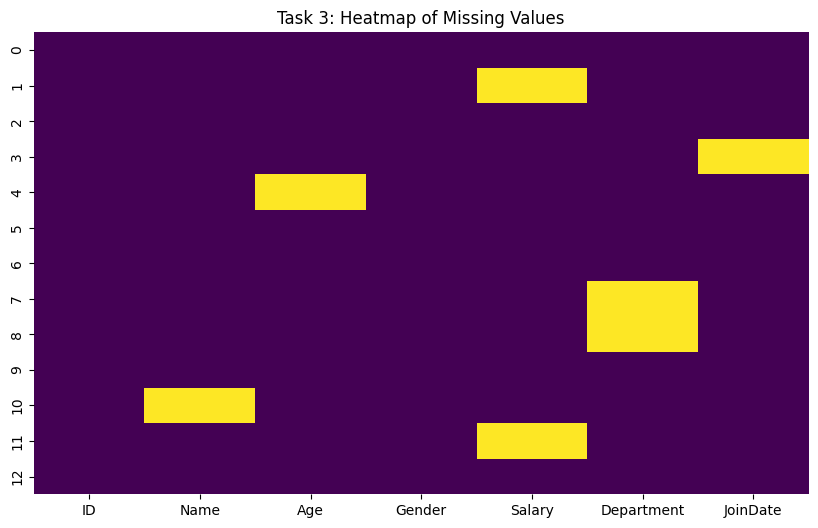

Task 4: Dropped columns with >50% missing values. Columns before: 7, after: 7

Task 5: Duplicate rows found:
    ID    Name   Age  Gender    Salary Department    JoinDate
8   8  Hannah  45.0  Female  100000.0        NaN  2015-11-11 

Task 6: Duplicate rows after removal (should be empty):
 Empty DataFrame
Columns: [ID, Name, Age, Gender, Salary, Department, JoinDate]
Index: [] 

Task 7: Data inconsistencies in categorical columns:

Column 'Name' unique values before cleaning:
[' Alice ' 'Bob' 'Charlie' 'Diana' 'Edward' 'Fiona' 'George' 'Hannah'
 'Ian' 'Jack' 'Karen']
Column 'Name' unique values after cleaning:
['alice' 'bob' 'charlie' 'diana' 'edward' 'fiona' 'george' 'hannah' 'ian'
 'jack' 'karen']

Column 'Gender' unique values before cleaning:
['Female' 'Male' 'male']
Column 'Gender' unique values after cleaning:
['female' 'male']

Column 'Department' unique values before cleaning:
['HR' 'IT' 'Finance' 'hr' 'Management']
Column 'Department' unique values after cleaning:
['hr' 'it' '

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

# Create a sample CSV dataset as a multiline string (simulate CSV file)
csv_data = """
ID,Name,Age,Gender,Salary,Department,JoinDate
1, Alice ,25,Female,50000,HR,2018-05-21
2,Bob,30,Male,,IT,2017-08-14
3,Charlie,35,male,70000,Finance,2016-09-30
4,Diana,40,Female,80000,Finance,
5,Edward,,Male,60000,IT,2019-07-01
6,Fiona,28,Female,55000,HR,2018-05-21
7,George,28,male,55000,hr,2018-05-21
8,Hannah,45,Female,100000,,2015-11-11
8,Hannah,45,Female,100000,,2015-11-11
9,Ian,50,Male,120000,Management,2010-01-10
10,,55,Male,130000,Management,2012-02-20
11,Jack,60,Male,,Management,2012-02-20
12,Karen,32,Female,65000,IT,2019-04-15
"""

# Task 1: Load CSV Dataset
df = pd.read_csv(StringIO(csv_data))
print("Task 1: First five rows of dataset:\n", df.head(), "\n")

# Task 2: Check for Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Task 2: Columns with missing values and their counts:\n", missing_values, "\n")

# Task 3: Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Task 3: Heatmap of Missing Values')
plt.show()

# Task 4: Remove Columns with >50% Missing Values
threshold = len(df) * 0.5
cols_before = df.shape[1]
df = df.dropna(axis=1, thresh=threshold)
cols_after = df.shape[1]
print(f"Task 4: Dropped columns with >50% missing values. Columns before: {cols_before}, after: {cols_after}\n")

# Task 5: Identify Duplicate Rows
duplicates = df[df.duplicated()]
print("Task 5: Duplicate rows found:\n", duplicates, "\n")

# Task 6: Remove Duplicate Rows
df = df.drop_duplicates()
duplicates_after = df[df.duplicated()]
print("Task 6: Duplicate rows after removal (should be empty):\n", duplicates_after, "\n")

# Task 7: Check Data Inconsistencies in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Task 7: Data inconsistencies in categorical columns:")
for col in cat_cols:
    unique_vals = df[col].dropna().unique()
    print(f"\nColumn '{col}' unique values before cleaning:")
    print(unique_vals)
    
    # Normalize by stripping spaces and lowercasing
    df[col] = df[col].str.strip().str.lower()
    
    unique_vals_after = df[col].dropna().unique()
    print(f"Column '{col}' unique values after cleaning:")
    print(unique_vals_after)

print()

# Task 8: Get Summary of Data Quality
total_records = len(df)
num_duplicates = df.duplicated().sum()
cols_with_missing = df.columns[df.isnull().any()].tolist()
print(f"Task 8: Data Quality Summary:")
print(f"Total records: {total_records}")
print(f"Number of duplicate rows: {num_duplicates}")
print(f"Columns with missing values: {cols_with_missing}\n")

# Task 9: Generate Data Quality Report
print("Task 9: Data Quality Report")

# Missing values report
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Numerical summary
print("\nNumerical Columns Summary:")
print(df.describe())

# Categorical distribution
print("\nCategorical Columns Distribution:")
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

print()

# Task 10: Advanced Data Imputation
# Impute numerical columns with mean
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("Task 10: Dataset after advanced data imputation (show first 5 rows):")
print(df.head())
